Loaded and displayed the original image under consideration.

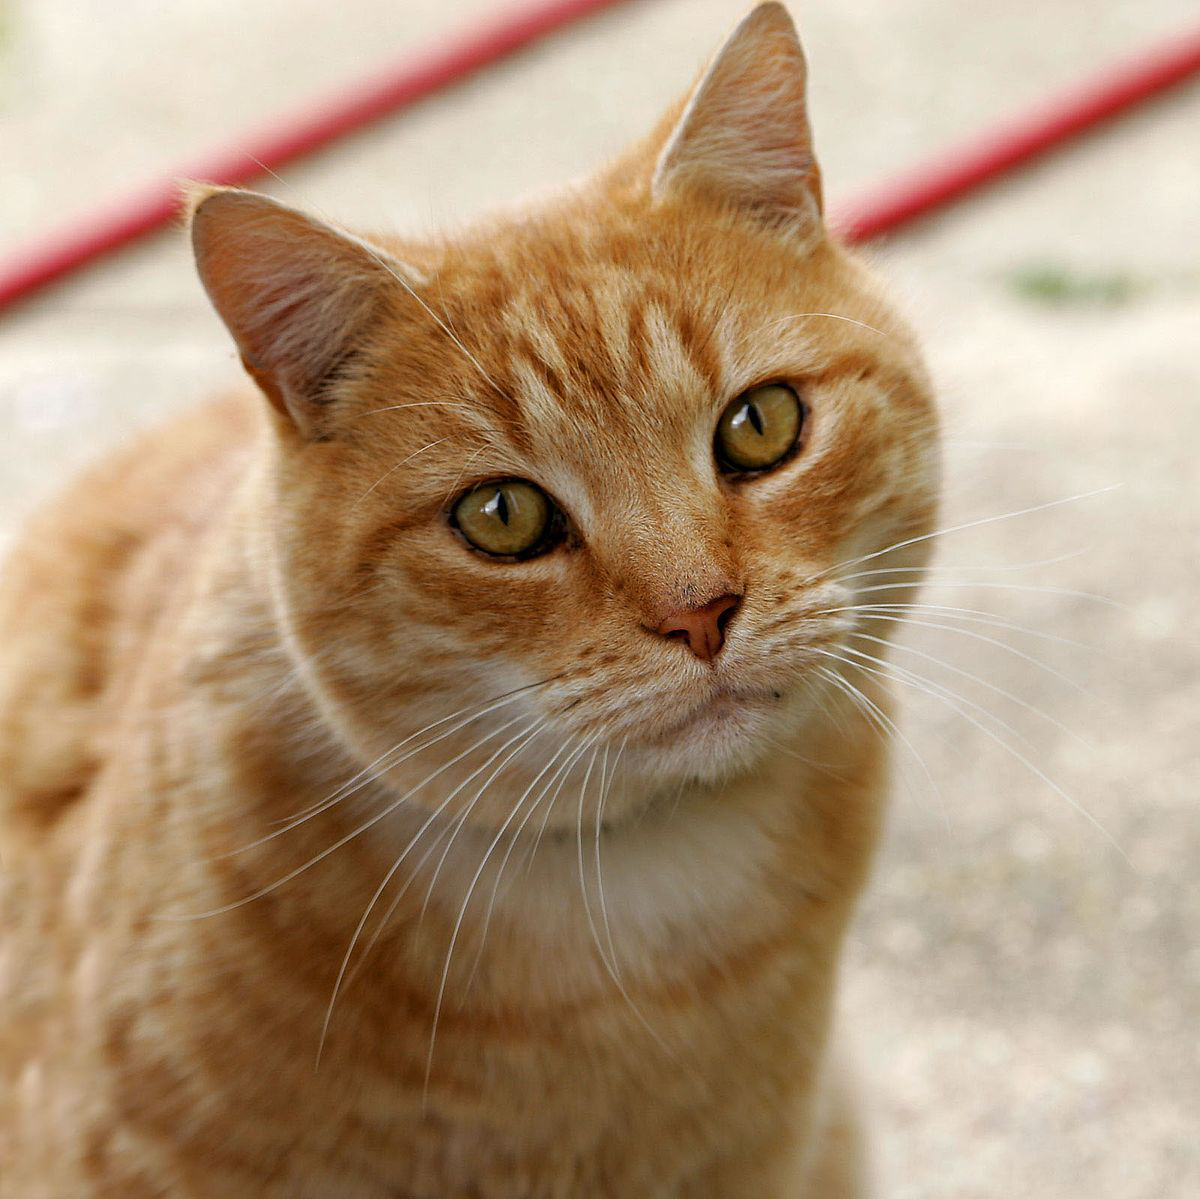

In [10]:
import numpy as np
from PIL import Image
import random as rnd

#Open Image
im=Image.open('/content/drive/My Drive/Colab Notebooks/Assignment1/11.jpg')
im

* Corrupted the images by randomly choosing some pixels and replacing the pixel values with random/junk values. 
* Displayed and saved the noisy images.





In [11]:
data = np.array(im)
m,n = im.size # stored dimensions

# to introduce noised in 5% of total pixels
for i in np.arange(m*n*.05):
  x = int(rnd.random()*(m-1)) # randomly chose a row
  y = int(rnd.random()*(n-1)) # randomly chose a column
  # assign random pixel values to the randomly selected pixel co-ordinate
  data[x][y] = rnd.random()*255, rnd.random()*255, rnd.random()*255 
    
# recreate image from the manipulated pixel values
noised = Image.fromarray(data)
noised.save("/content/drive/My Drive/Colab Notebooks/Assignment1/noised.JPG")
noised

Output hidden; open in https://colab.research.google.com to view.

* Read the saved noisy images. 
* Identified the noisy pixels by comparing them with neighboring pixels.
* Replaced the "noisy pixels" identified in above with **mean** of the neighboring pixels.
* Displayed the "denoised" images.




In [12]:

import numpy as np
from PIL import Image

# import the noised image pixel values into a numpy array
data = np.array(noised)
m,n = noised.size

i=0
for i in np.arange(1,m-2):
  j=0
  for j in np.arange(1,n-2):
    # reached each pixel's co-rdinate; omitted boundary pixels
    sum=0,0,0
    # iterate through neighbourhood of each pixel
    k=0
    for k in range(-1,2):
      l=0
      for l in np.arange(-1,2):
        sum = sum+data[i+k][j+k] # add up neighbourhood values
        #print(i, j, k, l, data[i+k][j+l], sum) 
    sum= sum-data[i][j] # remove the central pixel value
    mean = sum/8  # evaluate mean value of neighbouring pixels
    diff = abs(data[i][j]-mean) # evaluate the difference of pixel value with mean of neighbouring pixels
    # print(mean,data[i][j],diff)

    if (diff[0]+diff[1]+diff[2])>20:  # to set the thresold to identify corrupted pixel
      data[i][j] = mean # replace the pixel with mean of neighbours if found corrupted 

# recreate image from the manipulated pixel values
meanImage = Image.fromarray(data)
meanImage.save("/content/drive/My Drive/Colab Notebooks/Assignment1/meanImage.JPG")
meanImage

Output hidden; open in https://colab.research.google.com to view.

* Read the saved noisy images. 
* Identified the noisy pixels by comparing them with neighboring pixels. 
* Replaced the "noisy pixels" identified in above with **median** of the neighboring pixels. 
* Displayed the "denoised" images.

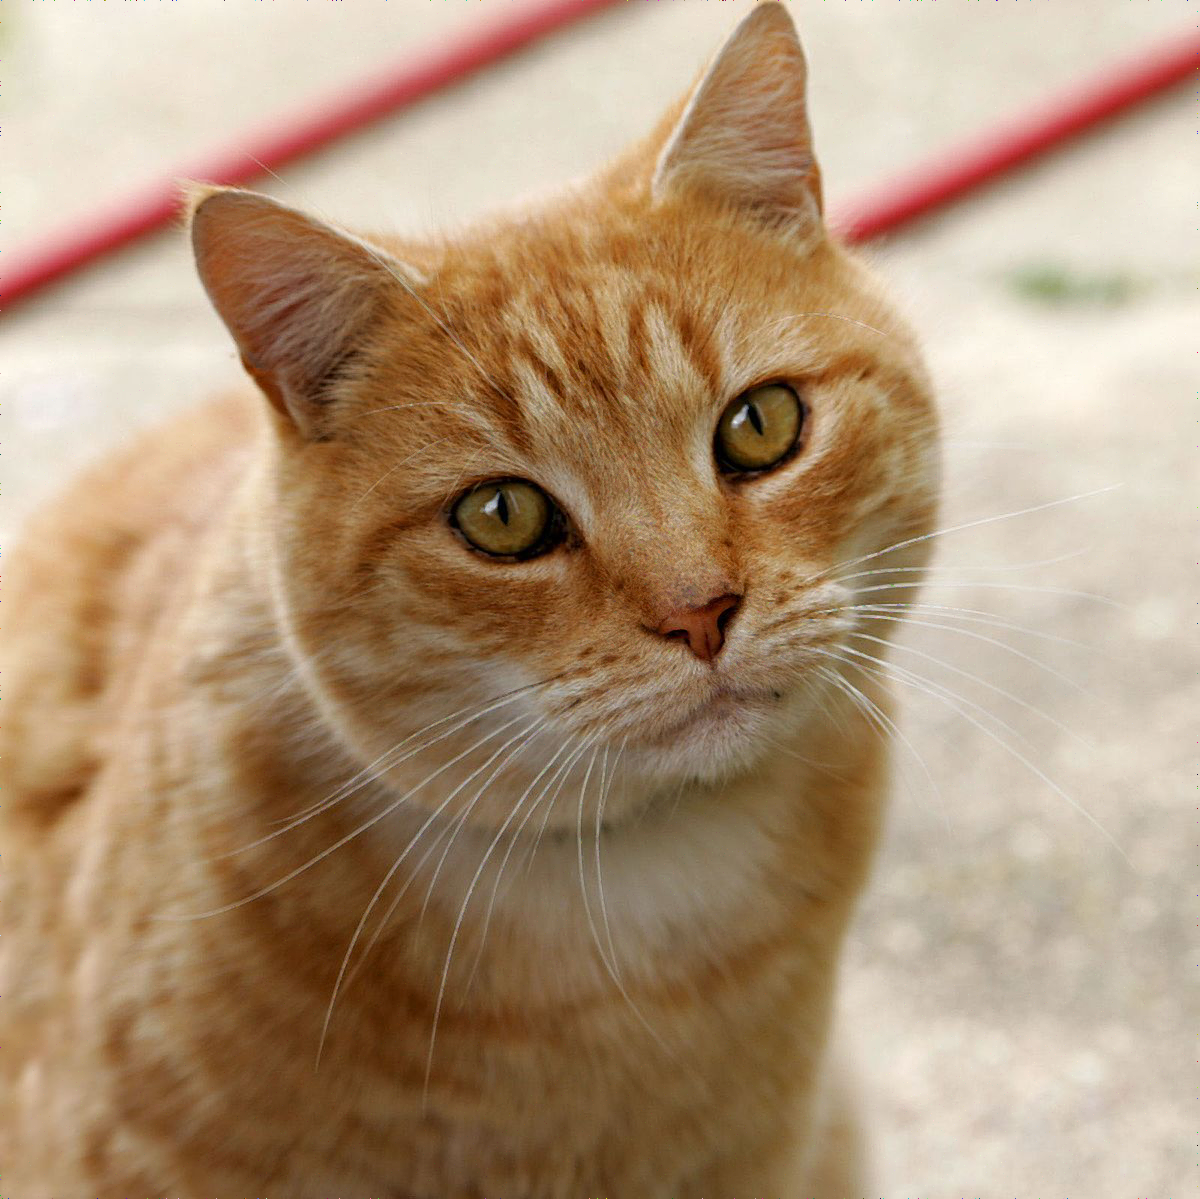

In [13]:
import numpy as np
from PIL import Image


# import the noised image pixel values into a numpy array
data = np.array(noised)
m,n = noised.size

i=0
for i in np.arange(1,m-2):
  j=0
  for j in np.arange(1,n-2):
    # reached each pixel's co-rdinate; omitted boundary pixels
    k=0
    for k in np.arange(0,3):  # to iterate through the RGB triplets
      # stored all the neighbour of concerned pixel into a numpy array
      nbr = np.array([data[i+1][j][k],data[i][j+1][k],data[i+1][j+1][k],data[i-1][j-1][k],data[i+1][j-1][k],data[i-1][j+1][k],data[i-1][j][k],data[i][j-1][k]])
      # to calculate the median of the neighbouring pixels
      nbr.sort()
      mdn = (int(nbr[3])+int(nbr[4]))/2
      diff = abs(mdn-data[i][j][k]) # calculate the difference of concerned pixel from median of neighbours
      #print(nbr,mdn,data[i][j][k],diff)
      if diff > 20: # to set the thresold to identify corrupted pixel
        data[i][j][k] = mdn   # replace with median of neighbours for corrupted pixels

# recreate image from the manipulated pixel values
medianImage = Image.fromarray(data)
medianImage.save("/content/drive/My Drive/Colab Notebooks/Assignment1/medianImage.JPG")
medianImage
